### Single Interval at Finite Temperature and Finite Length (all T) (Varying T)

Note that we can also fix T but vary length.

We will directly use KerasTuner.

We set $\ell =0.5$, $\epsilon=0.1$. We vary $\beta$ where $\beta$ is the inverse temperature.

Physical parameter of data distributes as $\beta=0.1, \beta<5.1, \beta+=0.0005$. 


In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Single_Interval_allT.csv', encoding='utf-8', encoding_errors='ignore')
df

,Correct Entropy,Approx Entropy,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
0,4.623360,3.613449,0.968806,0.469857,0.304185,0.221792,0.172683,0.140193,0.117184,0.100086,...,0.012141,0.011748,0.011376,0.011024,0.010689,0.010372,0.010070,0.009783,0.009510,0.009250
1,4.598970,3.602399,0.968230,0.469316,0.303676,0.221313,0.172231,0.139766,0.116781,0.099704,...,0.012035,0.011645,0.011275,0.010925,0.010594,0.010279,0.009979,0.009694,0.009423,0.009164
2,4.574840,3.591366,0.967650,0.468771,0.303164,0.220831,0.171777,0.139338,0.116376,0.099322,...,0.011930,0.011542,0.011176,0.010828,0.010499,0.010186,0.009889,0.009606,0.009337,0.009080
3,4.550950,3.580350,0.967065,0.468223,0.302648,0.220346,0.171321,0.138908,0.115971,0.098939,...,0.011826,0.011441,0.011077,0.010732,0.010405,0.010095,0.009800,0.009519,0.009252,0.008997
4,4.527300,3.569353,0.966475,0.467670,0.302130,0.219860,0.170863,0.138477,0.115564,0.098555,...,0.011723,0.011341,0.010979,0.010637,0.010312,0.010004,0.009711,0.009433,0.009167,0.008915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.385952,0.379820,0.251335,0.050204,0.020749,0.011974,0.008000,0.005773,0.004376,0.003437,...,0.000164,0.000157,0.000150,0.000143,0.000137,0.000132,0.000126,0.000122,0.000117,0.000112
9996,0.385952,0.379820,0.251335,0.050204,0.020749,0.011974,0.008000,0.005773,0.004376,0.003437,...,0.000164,0.000157,0.000150,0.000143,0.000137,0.000132,0.000126,0.000122,0.000117,0.000112
9997,0.385952,0.379820,0.251335,0.050204,0.020749,0.011974,0.008000,0.005773,0.004376,0.003437,...,0.000164,0.000157,0.000150,0.000143,0.000137,0.000132,0.000126,0.000122,0.000117,0.000112
9998,0.385952,0.379820,0.251335,0.050204,0.020749,0.011974,0.008000,0.005773,0.004376,0.003437,...,0.000164,0.000157,0.000150,0.000143,0.000137,0.000132,0.000126,0.000122,0.000117,0.000112


C:\Users\zxpet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


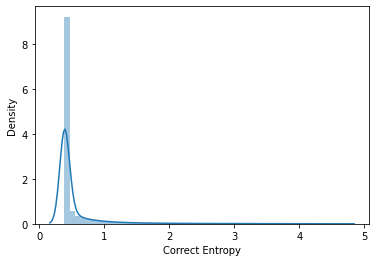

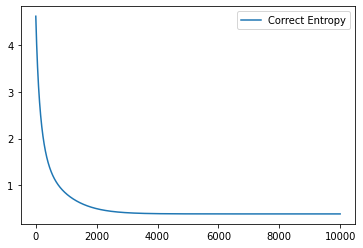

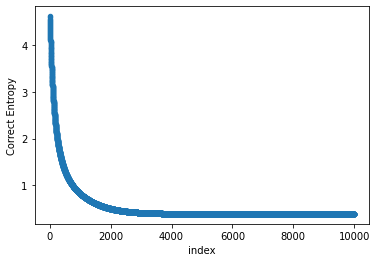

In [2]:
# Here we should check the data
# If there are problems with data (e.g. extreme values, weired distribution), use Scaler in the next block

print(sns.distplot(df['Correct Entropy']))
# Safe to ignore warnings

print(df.plot(y='Correct Entropy', use_index=True))

print(df.reset_index().plot.scatter(x='index',y='Correct Entropy'))

In [3]:
df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

# do the splitting twice for to separate the data points to train-validation-test sets, we do 80-10-10%.

X = df1
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="FiniteTtest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 06s]
val_loss: 1.6187366327358177e-05

Best val_loss So Far: 1.6187366327358177e-05
Total elapsed time: 00h 01m 05s
INFO:tensorflow:Oracle triggered exit


In [3]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) 
best_hps # returns a list

In [4]:
# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
282/282 [==============================] - 0s 461us/step - loss: 0.0913 - mae: 0.1321
Epoch 2/60
282/282 [==============================] - 0s 451us/step - loss: 0.0049 - mae: 0.0251
Epoch 3/60
282/282 [==============================] - 0s 458us/step - loss: 0.0034 - mae: 0.0235
Epoch 4/60
282/282 [==============================] - 0s 447us/step - loss: 0.0025 - mae: 0.0186
Epoch 5/60
282/282 [==============================] - 0s 454us/step - loss: 0.0017 - mae: 0.0151
Epoch 6/60
282/282 [==============================] - 0s 465us/step - loss: 0.0012 - mae: 0.0111
Epoch 7/60
282/282 [==============================] - 0s 444us/step - loss: 9.1166e-04 - mae: 0.0094
Epoch 8/60
282/282 [==============================] - 0s 454us/step - loss: 7.2874e-04 - mae: 0.0085
Epoch 9/60
282/282 [==============================] - 0s 444us/step - loss: 5.9528e-04 - mae: 0.0083
Epoch 10/60
282/282 [==============================] - 0s 451us/step - loss: 4.8790e-04 - mae: 0.0081
Epoch 11/60
2

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                3264      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


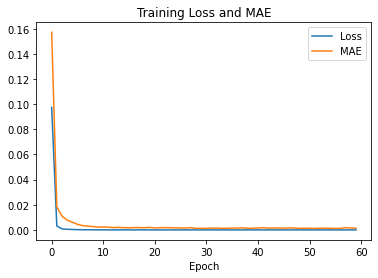

     Correct Entropy  Model Predictions
0           0.386110           0.386943
1           0.387808           0.388599
2           0.549440           0.550951
3           0.387647           0.388441
4           0.388348           0.389126
..               ...                ...
995         0.392065           0.392771
996         0.386032           0.386866
997         0.404789           0.405340
998         0.507738           0.508857
999         0.385968           0.386804

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


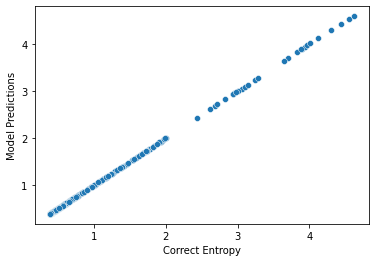

In [7]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [8]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0           0.386110           0.386943             0.379962
1           0.387808           0.388599             0.381494
2           0.549440           0.550951             0.534579
3           0.387647           0.388441             0.381349
4           0.388348           0.389126             0.381982
..               ...                ...                  ...
995         0.392065           0.392771             0.385355
996         0.386032           0.386866             0.379892
997         0.404789           0.405340             0.397013
998         0.507738           0.508857             0.494369
999         0.385968           0.386804             0.379834

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.000833              0.006148
1               0.000791              0.006314
2               0.001511              0.014861
3               0.000794              0.006298
4       

In [9]:
best_models = tuner.get_best_models(top_n)
best_models

In [10]:
model = best_models[2] 
model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
282/282 [==============================] - 0s 490us/step - loss: 2.0266e-05 - mae: 0.0016
Epoch 2/10
282/282 [==============================] - 0s 490us/step - loss: 1.6374e-05 - mae: 0.0015
Epoch 3/10
282/282 [==============================] - 0s 486us/step - loss: 1.7575e-05 - mae: 0.0018
Epoch 4/10
282/282 [==============================] - 0s 490us/step - loss: 1.2218e-05 - mae: 0.0015
Epoch 5/10
282/282 [==============================] - 0s 490us/step - loss: 1.1020e-05 - mae: 0.0014
Epoch 6/10
282/282 [==============================] - 0s 493us/step - loss: 1.3655e-05 - mae: 0.0018
Epoch 7/10
282/282 [==============================] - 0s 486us/step - loss: 9.6461e-06 - mae: 0.0014
Epoch 8/10
282/282 [==============================] - 0s 486us/step - loss: 7.5695e-06 - mae: 0.0012
Epoch 9/10
282/282 [==============================] - 0s 486us/step - loss: 7.1782e-06 - mae: 0.0014
Epoch 10/10
282/282 [==============================] - 0s 525us/step - loss: 6.8187e-06 - m

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


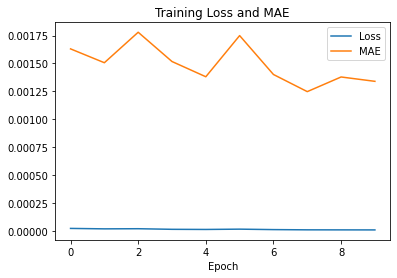

     Correct Entropy  Model Predictions
0           0.386110           0.386371
1           0.387808           0.388006
2           0.549440           0.550146
3           0.387647           0.387850
4           0.388348           0.388527
..               ...                ...
995         0.392065           0.392125
996         0.386032           0.386296
997         0.404789           0.404603
998         0.507738           0.507908
999         0.385968           0.386234

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


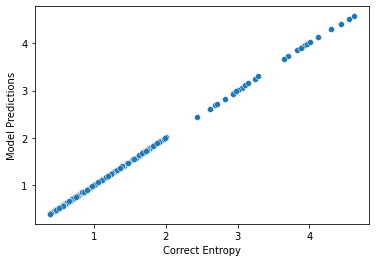

In [12]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [13]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0           0.386110           0.386371             0.379962
1           0.387808           0.388006             0.381494
2           0.549440           0.550146             0.534579
3           0.387647           0.387850             0.381349
4           0.388348           0.388527             0.381982
..               ...                ...                  ...
995         0.392065           0.392125             0.385355
996         0.386032           0.386296             0.379892
997         0.404789           0.404603             0.397013
998         0.507738           0.507908             0.494369
999         0.385968           0.386234             0.379834

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.000261              0.006148
1               0.000198              0.006314
2               0.000706              0.014861
3               0.000203              0.006298
4       

### Reduce the dimensions of data (keep only k=10).

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Single_Interval_allT.csv', encoding='utf-8', encoding_errors='ignore')

df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

df2 = df1.iloc[range(0,10000),range(0,10)]
df2

# note that in the end we need to re-compute the approximate entropy by summing each row

,1,2,3,4,5,6,7,8,9,10
0,0.968806,0.469857,0.304185,0.221792,0.172683,0.140193,0.117184,0.100086,0.086918,0.076492
1,0.968230,0.469316,0.303676,0.221313,0.172231,0.139766,0.116781,0.099704,0.086557,0.076149
2,0.967650,0.468771,0.303164,0.220831,0.171777,0.139338,0.116376,0.099322,0.086195,0.075806
3,0.967065,0.468223,0.302648,0.220346,0.171321,0.138908,0.115971,0.098939,0.085832,0.075463
4,0.966475,0.467670,0.302130,0.219860,0.170863,0.138477,0.115564,0.098555,0.085470,0.075120
...,...,...,...,...,...,...,...,...,...,...
9995,0.251335,0.050204,0.020749,0.011974,0.008000,0.005773,0.004376,0.003437,0.002774,0.002288
9996,0.251335,0.050204,0.020749,0.011974,0.008000,0.005773,0.004376,0.003437,0.002774,0.002288
9997,0.251335,0.050204,0.020749,0.011974,0.008000,0.005773,0.004376,0.003437,0.002774,0.002288
9998,0.251335,0.050204,0.020749,0.011974,0.008000,0.005773,0.004376,0.003437,0.002774,0.002288


In [2]:
X = df2
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="FiniteTtest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 06s]
val_loss: 0.0002680525321920868

Best val_loss So Far: 0.00012115882236685138
Total elapsed time: 00h 01m 03s
INFO:tensorflow:Oracle triggered exit


In [4]:
tuner.results_summary()

Results summary
Results in FiniteTtest\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 7.07224644429516e-05
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.0001320914743700996
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.00014934930368326604
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.00015424483353854157
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.0001907873374875635
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.0002101416903315112
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.0002932175084424671
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.0003429018906899728
Trial summary
Hyperparameters:
units: 32
optimizer: adam
Score: 0.000514065075549297
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.0005182790

In [5]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) 
best_hps # returns a list

In [6]:
# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
282/282 [==============================] - 0s 451us/step - loss: 0.0561 - mae: 0.0985
Epoch 2/60
282/282 [==============================] - 0s 422us/step - loss: 0.0048 - mae: 0.0285
Epoch 3/60
282/282 [==============================] - 0s 415us/step - loss: 0.0034 - mae: 0.0234
Epoch 4/60
282/282 [==============================] - 0s 426us/step - loss: 0.0023 - mae: 0.0180
Epoch 5/60
282/282 [==============================] - 0s 419us/step - loss: 0.0016 - mae: 0.0136
Epoch 6/60
282/282 [==============================] - 0s 426us/step - loss: 0.0010 - mae: 0.0106
Epoch 7/60
282/282 [==============================] - 0s 433us/step - loss: 7.8463e-04 - mae: 0.0092
Epoch 8/60
282/282 [==============================] - 0s 422us/step - loss: 6.2270e-04 - mae: 0.0084
Epoch 9/60
282/282 [==============================] - 0s 429us/step - loss: 5.4389e-04 - mae: 0.0085
Epoch 10/60
282/282 [==============================] - 0s 426us/step - loss: 4.5820e-04 - mae: 0.0085
Epoch 11/60
2

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                704       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


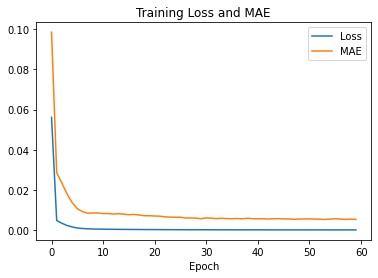

     Correct Entropy  Model Predictions
0           0.386110           0.388608
1           0.387808           0.390202
2           0.549440           0.549938
3           0.387647           0.390050
4           0.388348           0.390709
..               ...                ...
995         0.392065           0.394219
996         0.386032           0.388535
997         0.404789           0.406346
998         0.507738           0.507978
999         0.385968           0.388475

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


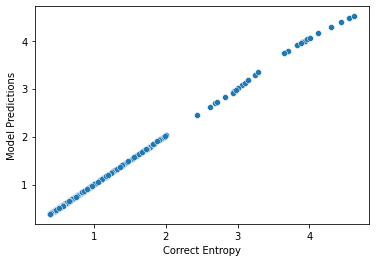

In [8]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [9]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0           0.386110           0.388608             0.361036
1           0.387808           0.390202             0.362376
2           0.549440           0.549938             0.498609
3           0.387647           0.390050             0.362248
4           0.388348           0.390709             0.362803
..               ...                ...                  ...
995         0.392065           0.394219             0.365756
996         0.386032           0.388535             0.360974
997         0.404789           0.406346             0.375983
998         0.507738           0.507978             0.462436
999         0.385968           0.388475             0.360923

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.002498              0.025074
1               0.002394              0.025432
2               0.000498              0.050831
3               0.002403              0.025399
4       